<a href="https://colab.research.google.com/github/nykolai-d/eda_with_python/blob/main/EDA_withPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Exploratory data analysis using Pandas, Numpy and Seaborne, on a dataset obtained from Kaggle:
https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [58]:
pip install calmap

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

In [60]:
%matplotlib inline

In [61]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [62]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [63]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [64]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [65]:
df['Date'] = pd.to_datetime(df['Date'])

In [66]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [67]:
df.set_index('Date',inplace=True)

In [68]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [69]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,986.000000,1000.00000,9.940000e+02,1000.000000,992.000000
mean,55.672130,5.510000,15.379369,321.042590,307.58738,4.761905e+00,15.379369,6.976109
std,26.494628,2.923431,11.708825,245.025702,234.17651,6.131516e-14,11.708825,1.716655
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,122.015250,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.134000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,470.909250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


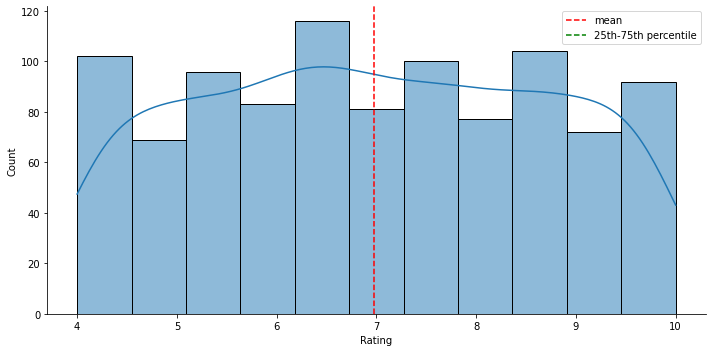

In [70]:
#Univariate analysis
#Distribution of costumers' ratings.
sns.displot(data=df['Rating'],kde=True,height=5,aspect=2)
plt.axvline(x=np.mean(df['Rating']),c='r',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25th-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()
plt.show()

In [71]:
#The distribution appears to be uniform, with no skewage

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda91a22250>,
      dtype=object)

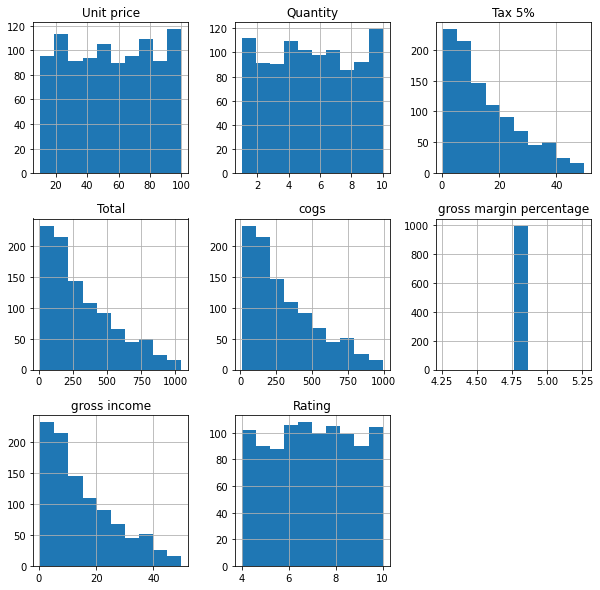

In [72]:
df.hist(figsize=(10,10))

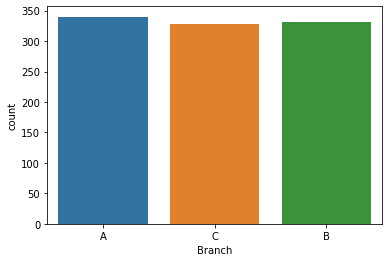

In [73]:
sns.countplot(x=df['Branch'])

In [74]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

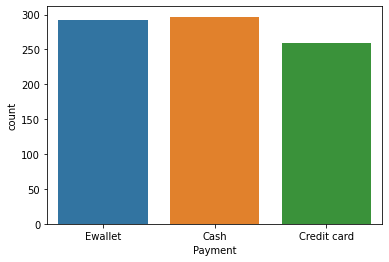

In [75]:
sns.countplot(x=df['Payment'])

In [76]:
#Bivariate analysis
#Is there a relation between gross income and customer rating?

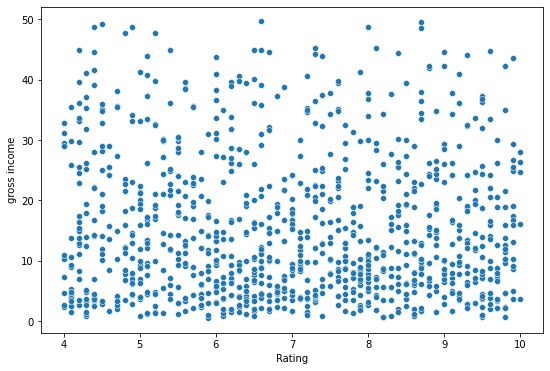

In [77]:
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.scatterplot(x=df['Rating'],y=df['gross income']) #no appartent correlation

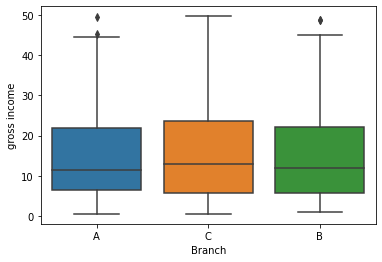

In [78]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

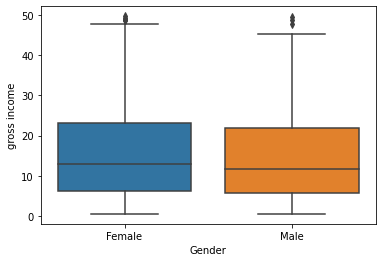

In [79]:
sns.boxplot(x=df['Gender'],y=df['gross income']) #both genders seem to spend the same on average

In [80]:
#grouping by dates
bydates=df.groupby(df.index).mean()
bydates

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,305.835409,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.766667
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,206.929333,212.324000,4.761905,10.616200,7.050000


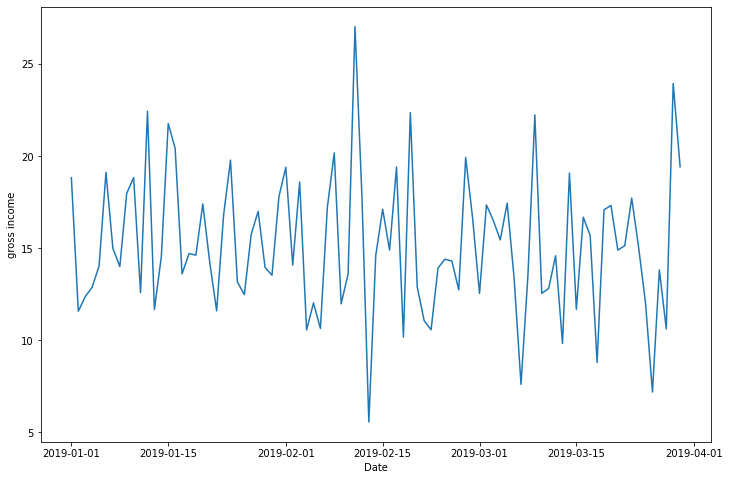

In [81]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot(x=bydates.index,y=bydates['gross income'])

In [82]:
df.duplicated().sum()

0

In [83]:
df[df.duplicated()==True] #no duplicated rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,


In [84]:
#in case there are duplicates
df.drop_duplicates(inplace=True)

In [85]:
df.isna().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type               30
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                       14
Time                         0
Payment                    151
cogs                         0
gross margin percentage      6
gross income                 0
Rating                       8
dtype: int64

In [86]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.030
Gender                     0.000
Product line               0.000
Unit price                 0.000
Quantity                   0.000
Tax 5%                     0.000
Total                      0.014
Time                       0.000
Payment                    0.151
cogs                       0.000
gross margin percentage    0.006
gross income               0.000
Rating                     0.008
dtype: float64

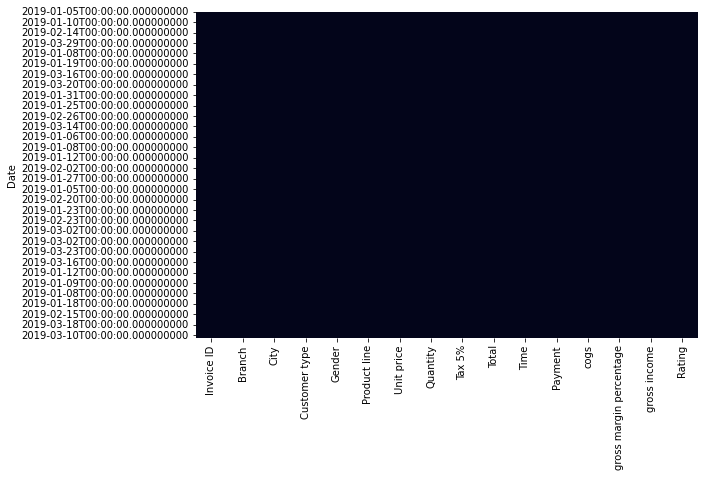

In [94]:
fig = plt.gcf()
fig.set_size_inches(9,6)
sns.heatmap(df.isnull(),cbar=False)

In [89]:
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [93]:
df.fillna(df.mode().iloc[0],inplace=True)

In [97]:
#Correlation analysis

In [100]:
round(np.corrcoef(df['gross income'],df['Rating'])[0][1],2)

-0.04

In [103]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.05,0.63,-0.01
Quantity,0.01,1.00,0.71,0.70,0.71,0.03,0.71,-0.02
Tax 5%,0.63,0.71,1.00,0.99,1.00,-0.04,1.00,-0.04
Total,0.63,0.70,0.99,1.00,0.99,-0.04,0.99,-0.05
cogs,0.63,0.71,1.00,0.99,1.00,-0.04,1.00,-0.04
gross margin percentage,-0.05,0.03,-0.04,-0.04,-0.04,1.00,-0.04,0.01
gross income,0.63,0.71,1.00,0.99,1.00,-0.04,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.05,-0.04,0.01,-0.04,1.00


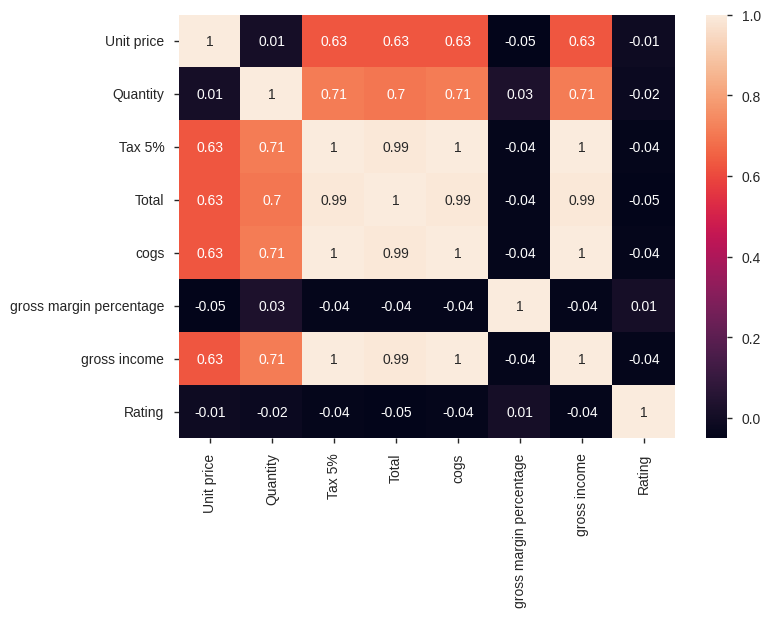

In [105]:
sns.heatmap(np.round(df.corr(),2),annot=True)